# Exploratory Data Analysis

In [18]:
# Load necessary packages
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

from utils.helper import Processor

In [2]:
fintech_path = './data/fintech/'
fintech_folders = glob.glob(f"{fintech_path}*/", recursive=True)
fintech = [path.split('/')[-2] for path in fintech_folders]

nbfc_path = './data/nbfc/'
nbfc_folders = glob.glob(f"{nbfc_path}*/", recursive=True)
nbfc = [path.split('/')[-2] for path in nbfc_folders]

In [3]:
with open('./data/config.json') as f:
    config_data = json.load(f)

In [4]:
stopwords = list(STOPWORDS)

## Wordcloud Analysis

### Fintech

Wordcloud for company: lendingkart


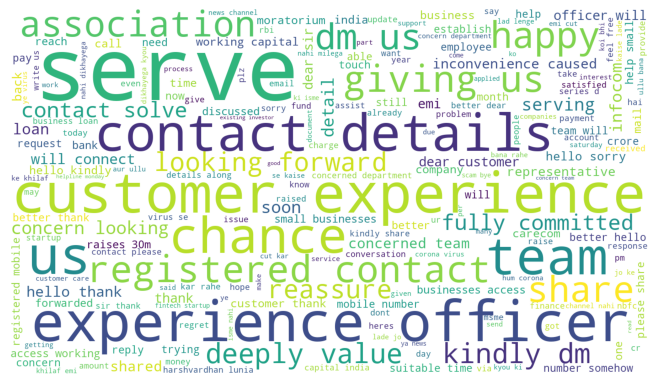



Wordcloud for company: mobikwik


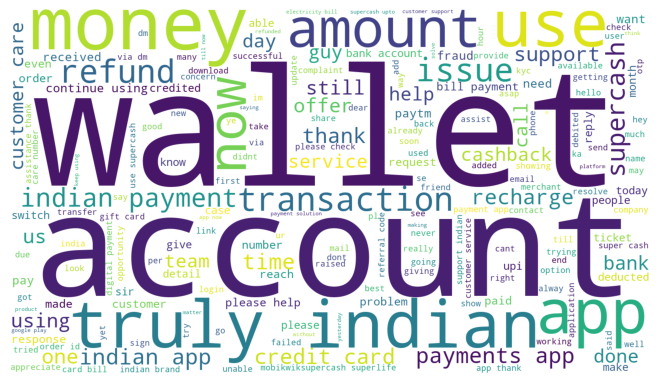



Wordcloud for company: faircent


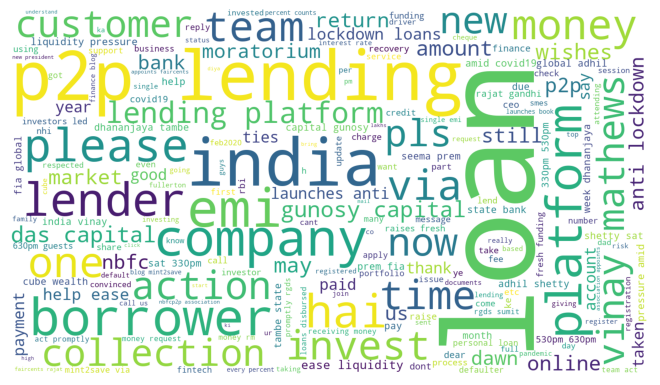



Wordcloud for company: paytm


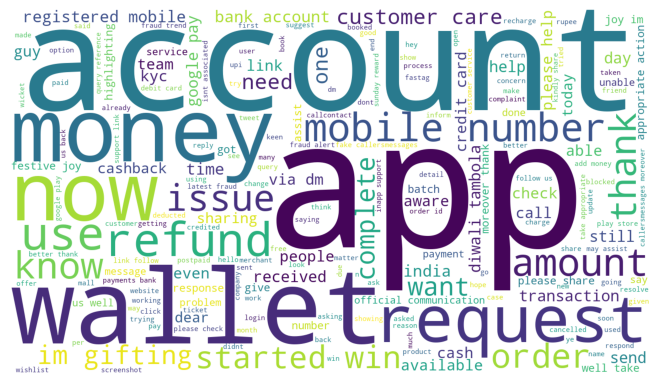



Wordcloud for company: pine_labs


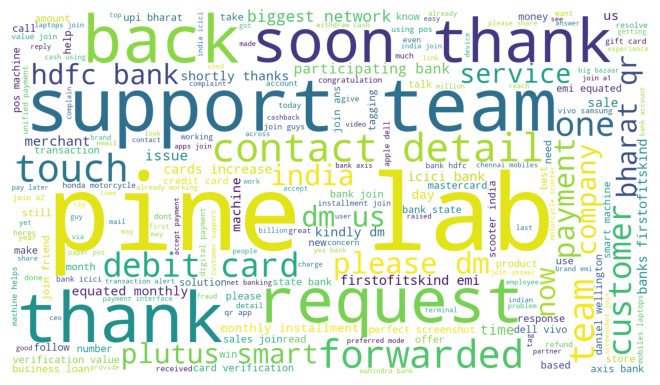

In [5]:
for comp in fintech:
    print(f"Wordcloud for company: {comp}")
    df = pd.read_csv(f'./data/fintech/{comp}/{comp}.csv', engine='python')
    text = " ".join(df['tweet'])
    processor = Processor()
    text = processor.preprocess_tweet(text)
    if comp in config_data["stopwords"]["fintech"]:
        stopwords = stopwords + config_data["stopwords"]["fintech"][comp]
    wordcloud = WordCloud(width = 1400, height = 800,
                            background_color ='white',
                            stopwords = stopwords,
                            min_font_size = 10).generate(text)

    # plot the WordCloud image
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    print("\n")

**Prominent keywords**

- *Lendingkart*: serve, change, registered contact, experience officer, team, customer experience, giving us, association
- *Mobikwik*: account, wallet, money, truly Indian, refund, issue, use
- *Faircent*: p2p lending, loan, Indian, EMI, lender, borrower, platform, company, team
- *Paytm*: account, app, wallet, money, refund, request, use
- *Pine Labs*: support team, thank, request, contact detail, debit card, customer, payment, team

### NBFC

Wordcloud for company: muthoot_finance


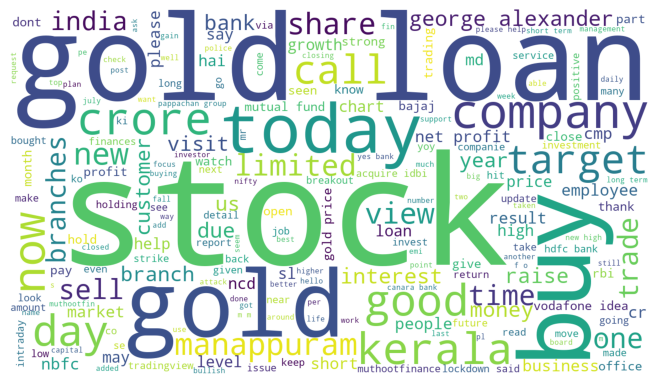



Wordcloud for company: bajaj_finance


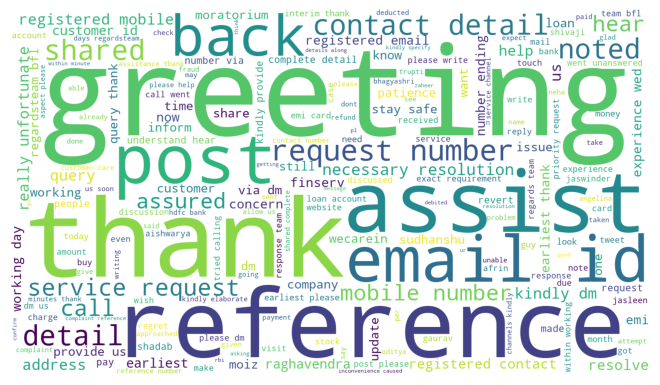



Wordcloud for company: aditya_birla_finance


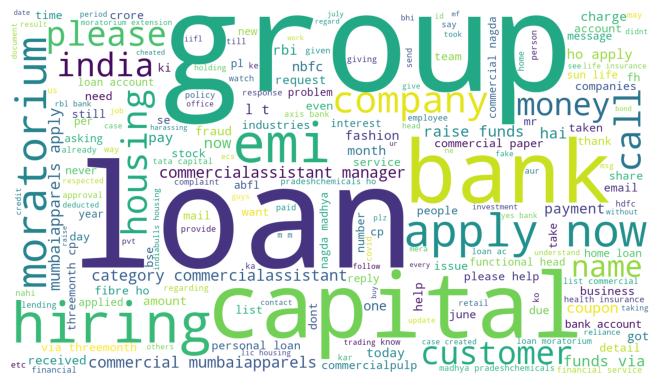



Wordcloud for company: cholamandalam


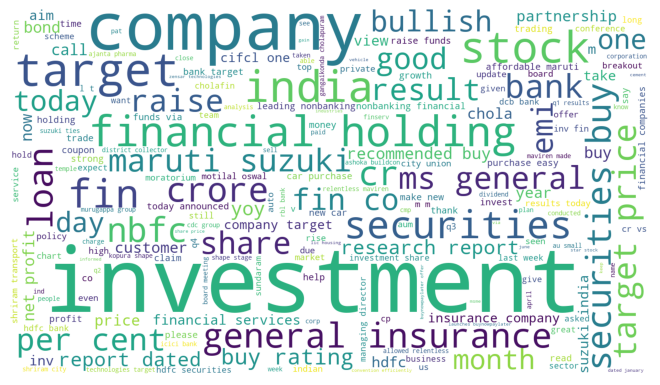

In [6]:
for comp in nbfc:
    print(f"Wordcloud for company: {comp}")
    df = pd.read_csv(f'./data/nbfc/{comp}/{comp}.csv', engine='python')
    text = " ".join(df['tweet'])
    processor = Processor()
    text = processor.preprocess_tweet(text)
    if comp in config_data["stopwords"]["nbfc"]:
        stopwords = stopwords + config_data["stopwords"]["nbfc"][comp]
    wordcloud = WordCloud(width = 1400, height = 800,
                            background_color ='white',
                            stopwords = stopwords,
                            min_font_size = 10).generate(text)

    # plot the WordCloud image
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    print("\n")

**Prominent keywords**

- *Muthoot Finance*: gold loan, buy, crore, stock, target, Kerala, company, target, mannapuram
- *Bajaj Finance*: greeting, thank, reference, assist, email id, post, request number, contact detail
- *Aditya Birla Finance*: group, capital, loan, hiring, EMI, moratorium, apply now
- *Cholamandalam*: investment, company, financial holding, securities, general insurance, India, target, stock

## Mixed-Coding Analysis

When a document contains sentences with different languages, it is said to be mixed-coded. It will be helpful to analyze whether tweets in languages other than English are significant in number and then devise a strategy to deal with them.

In [7]:
fintech_df = pd.read_hdf('./data/fintech/fintech.h5', key='fintech')
nbfc_df = pd.read_hdf('./data/nbfc/nbfc.h5', key='nbfc')

In [8]:
print(f"Number of languages in tweets of fintechs: {fintech_df['language'].nunique()}")
print(f"Number of languages in tweets of NBFCs: {nbfc_df['language'].nunique()}")

Number of languages in tweets of fintechs: 59
Number of languages in tweets of NBFCs: 45


In [9]:
fintech_df['is_en'] = fintech_df['language'].apply(lambda x: True if x == 'en' else False)
nbfc_df['is_en'] = nbfc_df['language'].apply(lambda x: True if x == 'en' else False)

In [28]:
isen_df = fintech_df.groupby(['company', 'is_en']).count()[['tweet']].reset_index()

In [29]:
isen_df['percentage'] = fintech_df.groupby(['company', 'is_en'], group_keys=False).size().groupby(level=0).apply(lambda x:100 * x/float(x.sum())).values

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_21680/3968065683.py:1: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [30]:
isen_df

,company,is_en,tweet,percentage
0,faircent,False,20,6.230530
1,faircent,True,301,93.769470
2,lendingkart,False,705,12.841530
3,lendingkart,True,4785,87.158470
4,mobikwik,False,8001,15.036647
5,mobikwik,True,45209,84.963353
6,paytm,False,241072,23.959180
7,paytm,True,765106,76.040820
8,pine_labs,False,1157,11.036917
9,pine_labs,True,9326,88.963083


In [31]:
fig = px.bar(isen_df, x="company", y="percentage", color="is_en", title="English Tweets Proportion", barmode='stack')
fig.show()

Tweets with non-English language can be eliminated since the remaining data can is still significant in number.  
For more advanced analysis, these tweets needed to be converted to the English language.